In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
from scipy.stats import norm
import powerlaw
%matplotlib inline

plt.rcParams.update({"font.family": "STIXGeneral",
                      "font.size": 20,
                      "mathtext.fontset": "cm"})

In [4]:
# matdata中数据字段
# 日期   上涨指数   时间
matdata = loadmat('./SSEC_min.mat')
matdata

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Nov 22 00:48:21 2016',
 '__version__': '1.0',
 '__globals__': [],
 'd': array([[array(['2003-01-02'], dtype='<U10')],
        [array(['2003-01-03'], dtype='<U10')],
        [array(['2003-01-03'], dtype='<U10')],
        ...,
        [array(['2015/12/31'], dtype='<U10')],
        [array(['2015/12/31'], dtype='<U10')],
        [array(['2015/12/31'], dtype='<U10')]], dtype=object),
 'p': array([[1348.13 ],
        [1318.918],
        [1318.436],
        ...,
        [3539.522],
        [3539.596],
        [3539.182]]),
 't': array([[array(['10:30'], dtype='<U5')],
        [array(['13:12'], dtype='<U5')],
        [array(['14:56'], dtype='<U5')],
        ...,
        [array(['15:00'], dtype='<U5')],
        [array(['15:01'], dtype='<U5')],
        [array(['15:02'], dtype='<U5')]], dtype=object)}

In [5]:
p_min = matdata['p'][:,0] # 获取到上证指数的分钟数据
r_min1 = np.log(p_min[1:])-np.log(p_min[:-1]) #计算上证指数的1分钟收益率序列

p_min5 = p_min[::5]  # 按照5分钟一次的尺度进行采样
r_min5 = np.log(p_min5[1:]) - np.log(p_min5[:-1]) #计算上证指数的5分钟收益率序列

p_min10 = p_min[::10]  # 按照10分钟一次的尺度进行采样
r_min10 = np.log(p_min10[1:]) - np.log(p_min10[:-1]) #计算上证指数的10分钟收益率序列

p_min30 = p_min[::30]  # 按照30分钟一次的尺度进行采样
r_min30 = np.log(p_min30[1:]) - np.log(p_min30[:-1]) #计算上证指数的30分钟收益率序列

p_min60 = p_min[::60]  # 按照60分钟一次的尺度进行采样
r_min60 = np.log(p_min60[1:]) - np.log(p_min60[:-1]) #计算上证指数的60分钟收益率序列

p_min120 = p_min[::120]  # 按照120分钟一次的尺度进行采样
r_min120 = np.log(p_min120[1:]) - np.log(p_min120[:-1]) #计算上证指数的120分钟收益率序列

p_min240 = p_min[::240]  # 按照240分钟一次的尺度进行采样
r_min240 = np.log(p_min240[1:]) - np.log(p_min240[:-1]) #计算上证指数的240分钟收益率序列

# 对各个时间尺度的收益率序列的异常值进行排除
r_min1 = r_min1[(r_min1>=-0.1)&(r_min1<=0.1)]
r_min5 = r_min5[(r_min5>=-0.1)&(r_min5<=0.1)]
r_min10 = r_min10[(r_min10>=-0.1)&(r_min10<=0.1)]
r_min30 = r_min30[(r_min30>=-0.1)&(r_min30<=0.1)]
r_min60 = r_min60[(r_min60>=-0.1)&(r_min60<=0.1)]
r_min120 = r_min120[(r_min120>=-0.1)&(r_min120<=0.1)]
r_min240 = r_min240[(r_min240>=-0.1)&(r_min240<=0.1)]
# 1分钟、5分钟、10分钟、30分钟、60分钟、120分钟、240分钟的收益率序列计算完成

D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in subtract
  """
D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater_

In [6]:
# 用于计算经验概率密度的函数
def myfun_emp_pdf(data_sample, num_bin=31):
    bin = np.linspace(np.min(data_sample), np.max(data_sample), num_bin)
    x_emp = np.zeros(len(bin)-1)
    y_emp = np.zeros(len(bin)-1)
    for i in range(len(bin)-1):
        x_emp[i] = (bin[i] + bin[i+1])/2
        y_emp[i] = np.sum( (data_sample >= bin[i]) & (data_sample < bin[i+1]) )/len(data_sample)/(bin[i+1] - bin[i])
    return x_emp, y_emp

x_emp_min1, y_emp_min1 = myfun_emp_pdf(r_min1, num_bin=51)
x_emp_min5, y_emp_min5 = myfun_emp_pdf(r_min5, num_bin=51)
x_emp_min10, y_emp_min10 = myfun_emp_pdf(r_min10, num_bin=51)
x_emp_min30, y_emp_min30 = myfun_emp_pdf(r_min30)
x_emp_min60, y_emp_min60 = myfun_emp_pdf(r_min60)
x_emp_min120, y_emp_min120 = myfun_emp_pdf(r_min120)
x_emp_min240, y_emp_min240 = myfun_emp_pdf(r_min240)

#为避免时间间隔太短收益率为0的情况
x_emp_min1 = x_emp_min1[y_emp_min1>0]
y_emp_min1 = y_emp_min1[y_emp_min1>0]
x_emp_min5 = x_emp_min5[y_emp_min5>0]
y_emp_min5 = y_emp_min5[y_emp_min5>0]


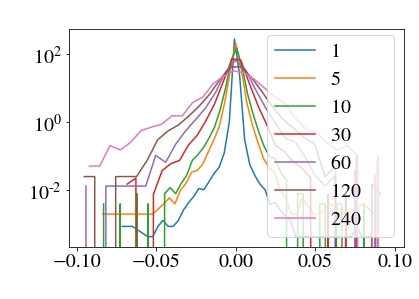

In [7]:
# 将经验概率密度画在一张图上
plt.semilogy(x_emp_min1, y_emp_min1, label='1分钟收益率')
plt.semilogy(x_emp_min5, y_emp_min5, label='5分钟收益率')
plt.semilogy(x_emp_min10, y_emp_min10, label='10分钟收益率')
plt.semilogy(x_emp_min30, y_emp_min30, label='30分钟收益率')
plt.semilogy(x_emp_min60, y_emp_min60, label='60分钟收益率')
plt.semilogy(x_emp_min120, y_emp_min120, label='120分钟收益率')
plt.semilogy(x_emp_min240, y_emp_min240, label='240分钟收益率')
plt.title('不同时间尺度的收益率经验概率密度')
plt.xlabel('收益率')
plt.ylabel('经验概率密度')
plt.legend()
plt.show()

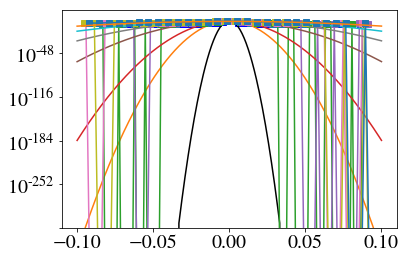

In [8]:
# 拟合正态分布
mu_min1, sigma_min1 = norm.fit(r_min1)  #拟合1分钟收益率序列，获得拟合的均值mu和标准差sigma
mu_min5, sigma_min5 = norm.fit(r_min5)
mu_min10, sigma_min10 = norm.fit(r_min10)
mu_min30, sigma_min30 = norm.fit(r_min30)
mu_min60, sigma_min60 = norm.fit(r_min60)
mu_min120, sigma_min120 = norm.fit(r_min120)
mu_min240, sigma_min240 = norm.fit(r_min240)
x_fit_general = np.linspace(-0.1, 0.1, 300)  #用于绘制不同尺度收益率拟合正态分布的 x 值范围
# 计算拟合正态分布的 y 值
y_fit_min1 = norm.pdf(x_fit_general, loc=mu_min1, scale=sigma_min1)  #1分钟收益率的y值
y_fit_min5 = norm.pdf(x_fit_general, loc=mu_min5, scale=sigma_min5)
y_fit_min10 = norm.pdf(x_fit_general, loc=mu_min10, scale=sigma_min10)
y_fit_min30 = norm.pdf(x_fit_general, loc=mu_min30, scale=sigma_min30)
y_fit_min60 = norm.pdf(x_fit_general, loc=mu_min60, scale=sigma_min60)
y_fit_min120 = norm.pdf(x_fit_general, loc=mu_min120, scale=sigma_min120)
y_fit_min240 = norm.pdf(x_fit_general, loc=mu_min240, scale=sigma_min240)
# 绘制图表
plt.semilogy(x_emp_min1, y_emp_min1, 's-b')  # 1分钟收益率的经验概率密度图
plt.semilogy(x_fit_general, y_fit_min1, '-k') #1分钟收益率正态分布拟合

plt.semilogy(x_emp_min5, y_emp_min5, 's-')  # 5分钟收益率的经验概率密度图
plt.semilogy(x_fit_general, y_fit_min5, '-') #5分钟收益率正态分布拟合

plt.semilogy(x_emp_min10, y_emp_min10, 's-')  # 10分钟收益率的经验概率密度图
plt.semilogy(x_fit_general, y_fit_min10, '-') #10分钟收益率正态分布拟合

plt.semilogy(x_emp_min30, y_emp_min30, 's-')  # 30分钟收益率的经验概率密度图
plt.semilogy(x_fit_general, y_fit_min30, '-') #30分钟收益率正态分布拟合

plt.semilogy(x_emp_min60, y_emp_min60, 's-')  # 60分钟收益率的经验概率密度图
plt.semilogy(x_fit_general, y_fit_min60, '-') #60分钟收益率正态分布拟合

plt.semilogy(x_emp_min120, y_emp_min120, 's-')  # 120分钟收益率的经验概率密度图
plt.semilogy(x_fit_general, y_fit_min120, '-') #120分钟收益率正态分布拟合

plt.semilogy(x_emp_min240, y_emp_min240, 's-')  # 240分钟收益率的经验概率密度图
plt.semilogy(x_fit_general, y_fit_min240, '-') #240分钟收益率正态分布拟合

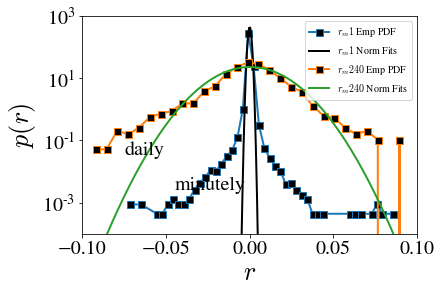

In [9]:
# 画图-修饰
plt.figure(1) #创建一个新的图形窗口  1分钟和240分钟的图形
plt.semilogy(x_emp_min1, y_emp_min1, 's-', lw=2, ms=7, mfc='k', label=r'$r_m1$ Emp PDF')
plt.semilogy(x_fit_general, y_fit_min1, '-k', lw=2, label=r'$r_m1$ Norm Fits')

plt.semilogy(x_emp_min240, y_emp_min240, 's-', lw=2, ms=7, mfc='k', label=r'$r_m240$ Emp PDF')
plt.semilogy(x_fit_general, y_fit_min240, '-', lw=2, label=r'$r_m240$ Norm Fits')

plt.xlim([-0.1, 0.1])
plt.xticks([-0.1, -0.05, 0, 0.05, 0.1])
plt.ylim([10**-4, 10**3])
plt.yticks(10.**np.arange(-3, 4, 2))
plt.xlabel(r'$r$', fontsize=26)
plt.ylabel(r'$p(r)$', fontsize=26)
plt.text(-0.075, 0.035, 'daily', fontsize=20)
plt.text(-0.045, 0.0025, 'minutely', fontsize=20)
plt.legend(loc='upper right', fontsize=10)
plt.savefig('1&240Fig_PDF_Return_CNMarkets_2024.jpg', dpi=600, bbox_inches='tight')  #保存图像

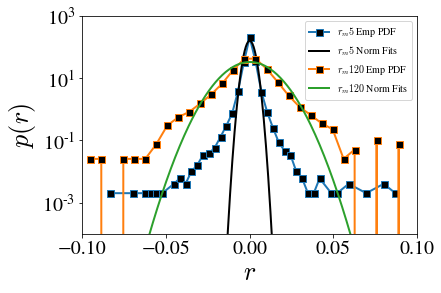

In [10]:
# 画图-修饰
plt.figure(2) #创建一个新的图形窗口  5分钟和120分钟的图形
plt.semilogy(x_emp_min5, y_emp_min5, 's-', lw=2, ms=7, mfc='k', label=r'$r_m5$ Emp PDF')
plt.semilogy(x_fit_general, y_fit_min5, '-k', lw=2, label=r'$r_m5$ Norm Fits')

plt.semilogy(x_emp_min120, y_emp_min120, 's-', lw=2, ms=7, mfc='k', label=r'$r_m120$ Emp PDF')
plt.semilogy(x_fit_general, y_fit_min120, '-', lw=2, label=r'$r_m120$ Norm Fits')

plt.xlim([-0.1, 0.1])
plt.xticks([-0.1, -0.05, 0, 0.05, 0.1])
plt.ylim([10**-4, 10**3])
plt.yticks(10.**np.arange(-3, 4, 2))
plt.xlabel(r'$r$', fontsize=26)
plt.ylabel(r'$p(r)$', fontsize=26)
plt.legend(loc='upper right', fontsize=10)
plt.savefig('5&120Fig_PDF_Return_CNMarkets_2024.jpg', dpi=600, bbox_inches='tight')  #保存图像

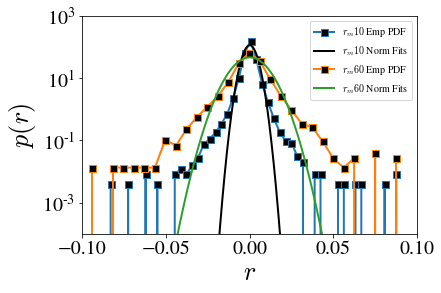

In [11]:
# 画图-修饰
plt.figure(3) #创建一个新的图形窗口  10分钟和60分钟的图形
plt.semilogy(x_emp_min10, y_emp_min10, 's-', lw=2, ms=7, mfc='k', label=r'$r_m10$ Emp PDF')
plt.semilogy(x_fit_general, y_fit_min10, '-k', lw=2, label=r'$r_m10$ Norm Fits')

plt.semilogy(x_emp_min60, y_emp_min60, 's-', lw=2, ms=7, mfc='k', label=r'$r_m60$ Emp PDF')
plt.semilogy(x_fit_general, y_fit_min60, '-', lw=2, label=r'$r_m60$ Norm Fits')

plt.xlim([-0.1, 0.1])
plt.xticks([-0.1, -0.05, 0, 0.05, 0.1])
plt.ylim([10**-4, 10**3])
plt.yticks(10.**np.arange(-3, 4, 2))
plt.xlabel(r'$r$', fontsize=26)
plt.ylabel(r'$p(r)$', fontsize=26)
plt.legend(loc='upper right', fontsize=10)
plt.savefig('10&60Fig_PDF_Return_CNMarkets_2024.jpg', dpi=600, bbox_inches='tight')  #保存图像

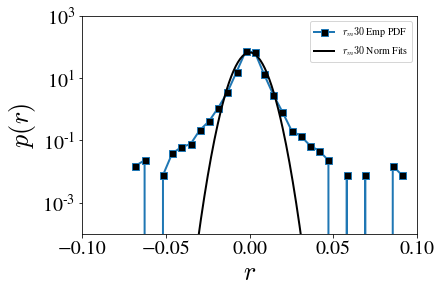

In [12]:
# 画图-修饰
plt.figure(4) #创建一个新的图形窗口  30分钟的图形
plt.semilogy(x_emp_min30, y_emp_min30, 's-', lw=2, ms=7, mfc='k', label=r'$r_m30$ Emp PDF')
plt.semilogy(x_fit_general, y_fit_min30, '-k', lw=2, label=r'$r_m30$ Norm Fits')

plt.xlim([-0.1, 0.1])
plt.xticks([-0.1, -0.05, 0, 0.05, 0.1])
plt.ylim([10**-4, 10**3])
plt.yticks(10.**np.arange(-3, 4, 2))
plt.xlabel(r'$r$', fontsize=26)
plt.ylabel(r'$p(r)$', fontsize=26)
plt.legend(loc='upper right', fontsize=10)
plt.savefig('30Fig_PDF_Return_CNMarkets_2024.jpg', dpi=600, bbox_inches='tight')  #保存图像

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


alpha: 3.0468871827880832
xmin: 0.0005945088239949214


log-likelihood ratio test: -0.1477989669225543
p-value: 0.7552767843463722


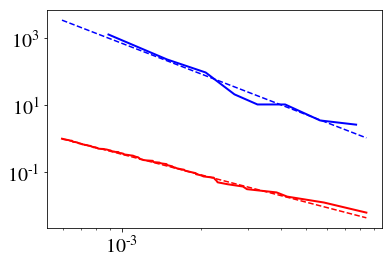

In [13]:
def powerlawTest(data):
        fit = powerlaw.Fit(data[::500])
        fig = fit.plot_pdf(color='b', linewidth=2)
        fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig)
        fit.plot_ccdf(color='r', linewidth=2)
        fit.power_law.plot_ccdf(color='r', linestyle='--', ax=fig)
        print('alpha:', fit.alpha)
        print('xmin:', fit.xmin)
        R, p = fit.distribution_compare('power_law', 'lognormal')
        print('log-likelihood ratio test:', R)
        print('p-value:', p)
        plt.show()

powerlawTest(r_min1)

Calculating best minimal value for power law fit
alpha: 2.224112661794857
xmin: 0.0045748094811068896
log-likelihood ratio test: 2.890404321886919e-06
p-value: 0.9991473923302928


D:\software\anaconda\lib\site-packages\powerlaw.py:1151: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data/self.xmin)))
D:\software\anaconda\lib\site-packages\powerlaw.py:1170: RuntimeWarning: invalid value encountered in log
  return 1 + len(data)/sum(log(data / (self.xmin)))


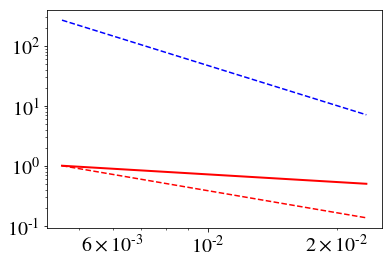

In [14]:
powerlawTest(r_min240)

Calculating best minimal value for power law fit
alpha: 1.6611271548472026
xmin: 0.0007417796632616103
log-likelihood ratio test: -0.25113941719279365
p-value: 0.6917569928026946


D:\software\anaconda\lib\site-packages\powerlaw.py:1151: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data/self.xmin)))
D:\software\anaconda\lib\site-packages\powerlaw.py:1170: RuntimeWarning: invalid value encountered in log
  return 1 + len(data)/sum(log(data / (self.xmin)))


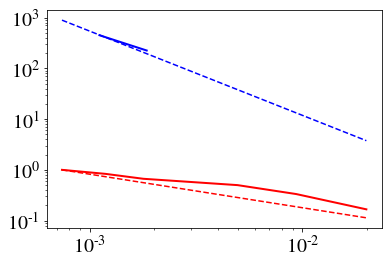

In [15]:
powerlawTest(r_min120)

Calculating best minimal value for power law fit
alpha: 4.238072594814083
xmin: 0.005582460623935859
log-likelihood ratio test: -0.09042239251719453
p-value: 0.7962065273960572


D:\software\anaconda\lib\site-packages\powerlaw.py:1151: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data/self.xmin)))
D:\software\anaconda\lib\site-packages\powerlaw.py:1170: RuntimeWarning: invalid value encountered in log
  return 1 + len(data)/sum(log(data / (self.xmin)))


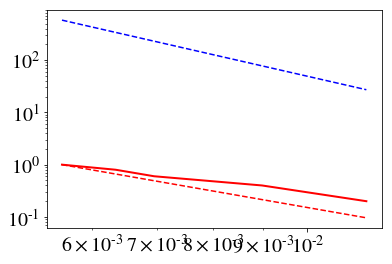

In [16]:
powerlawTest(r_min60)

Calculating best minimal value for power law fit


D:\software\anaconda\lib\site-packages\powerlaw.py:1151: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data/self.xmin)))
D:\software\anaconda\lib\site-packages\powerlaw.py:1170: RuntimeWarning: invalid value encountered in log
  return 1 + len(data)/sum(log(data / (self.xmin)))


alpha: 3.515146735983558
xmin: 0.004464829572138562
log-likelihood ratio test: -0.09162802345948196
p-value: 0.7697941644209888


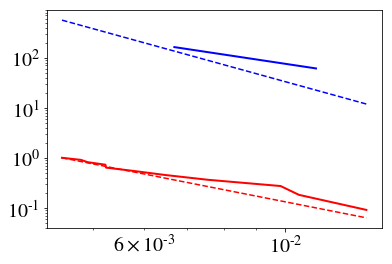

In [17]:
powerlawTest(r_min30)

Calculating best minimal value for power law fit
xmin progress: 11%

D:\software\anaconda\lib\site-packages\powerlaw.py:1151: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data/self.xmin)))
D:\software\anaconda\lib\site-packages\powerlaw.py:1170: RuntimeWarning: invalid value encountered in log
  return 1 + len(data)/sum(log(data / (self.xmin)))


alpha: 2.0243339675069887
xmin: 0.0009711681813895368
log-likelihood ratio test: -7.661943036675213
p-value: 0.01785552772945672


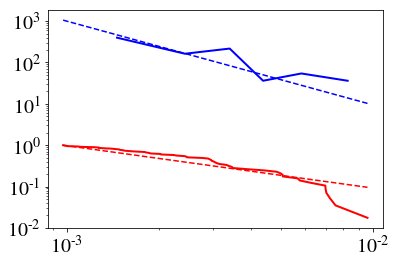

In [18]:
powerlawTest(r_min10)

Calculating best minimal value for power law fit


D:\software\anaconda\lib\site-packages\powerlaw.py:1151: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data/self.xmin)))
D:\software\anaconda\lib\site-packages\powerlaw.py:1170: RuntimeWarning: invalid value encountered in log
  return 1 + len(data)/sum(log(data / (self.xmin)))


alpha: 3.2938787878329676
xmin: 0.0019261064753743895
log-likelihood ratio test: -0.10262574820375336
p-value: 0.7583230048208769


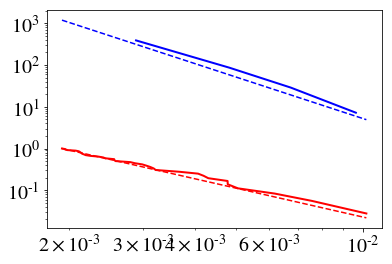

In [19]:
powerlawTest(r_min5)